In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import scipy.cluster.hierarchy as sch
%matplotlib inline
# loading data
X = pd.read_csv('C:/gskim/P4DS/data/ch9.csv')
X.columns=["x1", "x2","x3","x4","x5","x6"]
X.head()  # confirm data

C:\Users\gskim\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


,x1,x2,x3,x4,x5,x6
0,6,4,7,3,2,3
1,2,3,1,4,5,4
2,7,2,6,4,1,3
3,4,6,4,5,3,6
4,1,3,2,2,6,4


(-15, 15)

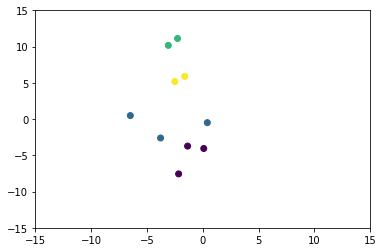

In [2]:
# create blobs
data = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [3]:
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters=3, 
                                     affinity='euclidean',
                                     linkage='ward')
Hclustering.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [4]:
# cluster analysis
H_mapping = {case: cluster for case,
            cluster in enumerate(Hclustering.labels_)}
print(H_mapping)

{0: 0, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1, 9: 2}


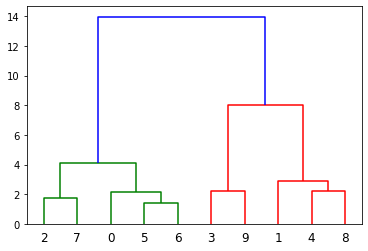

In [18]:
# draw dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

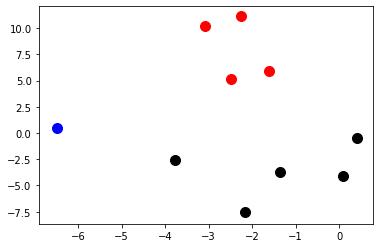

In [5]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')